# Qiskit

In [11]:
from qiskit import *
from qiskit.visualization import plot_histogram

## Represent a number with qubits

For starters, we will represent a number with qubits. Actually, we will not use any quantum properties of the qubits. The qubits will behave like classical bits, however, we will use quantum circuit diagrams to visualize the qubits.

Therefore, representing a number with qubits is a good first task to get common with quantum circuit diagrams.

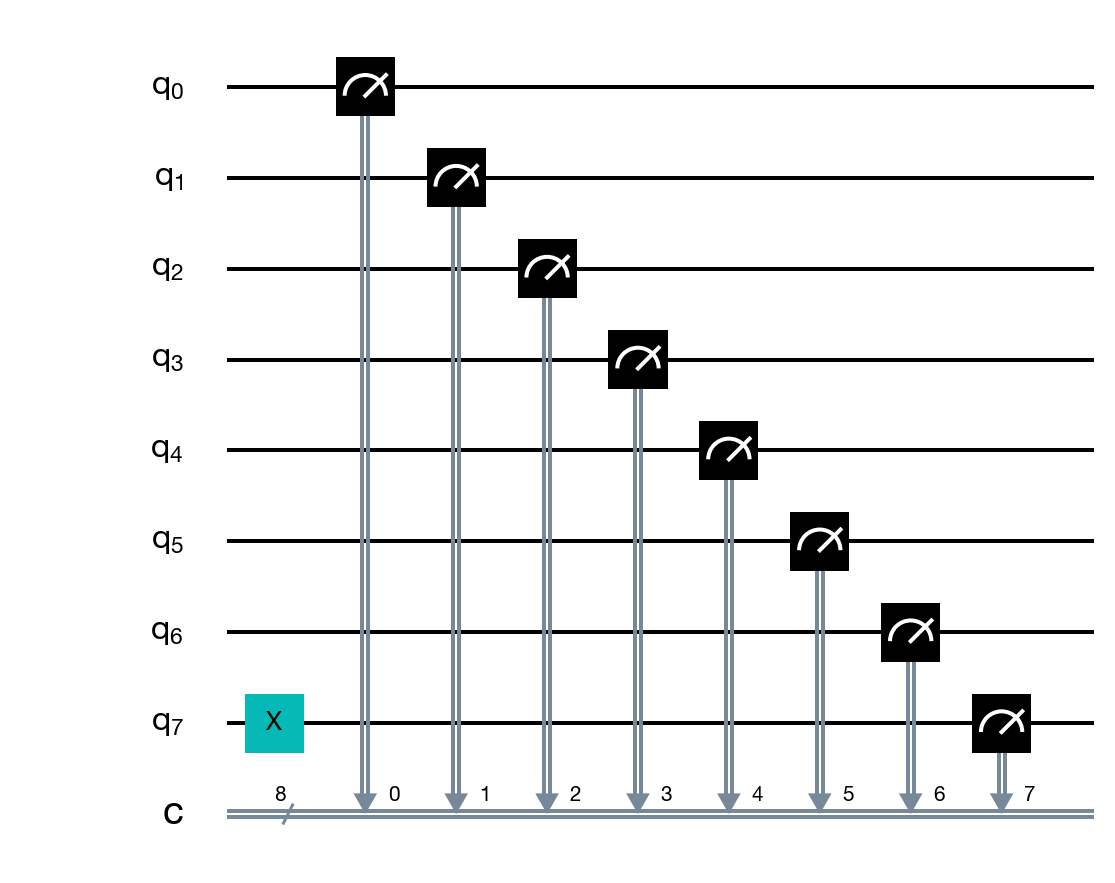

In [14]:
n = 8

qc_output = QuantumCircuit(n, n)

for j in range(n):
    qc_output.measure(j, j)
    
qc_encode = QuantumCircuit(n)
qc_encode.x(7)
    
qc = qc_encode + qc_output
qc.draw(output="mpl", justify="none")

The above figure shows the eight-qubit quantum circuit diagram we defined above.

Every of the eight qubits is initialized to 0. We apply a NOT operation to the seventh qubit to flip it to 1.
Thereafter, we apply a measurement to every qubit and project it onto a classical eight-bit state C.

In [26]:
execute(qc, Aer.get_backend('qasm_simulator')).result().get_counts()


{'0001': 1024}

The former command simulated our eight-qubit quantum circuit for us. We find that our simulation certainly yields the classical bit 10000000.
The zeros originate from qubits zero to six which were initialized to zero and the one originates from the seventh qubit.
All qubits are projected onto a classical bit string.

## Adding two numbers with qubits

As a next step we will increase the complexity of our quantum circuit and amend it to allow addition of two numbers represented by qubits.

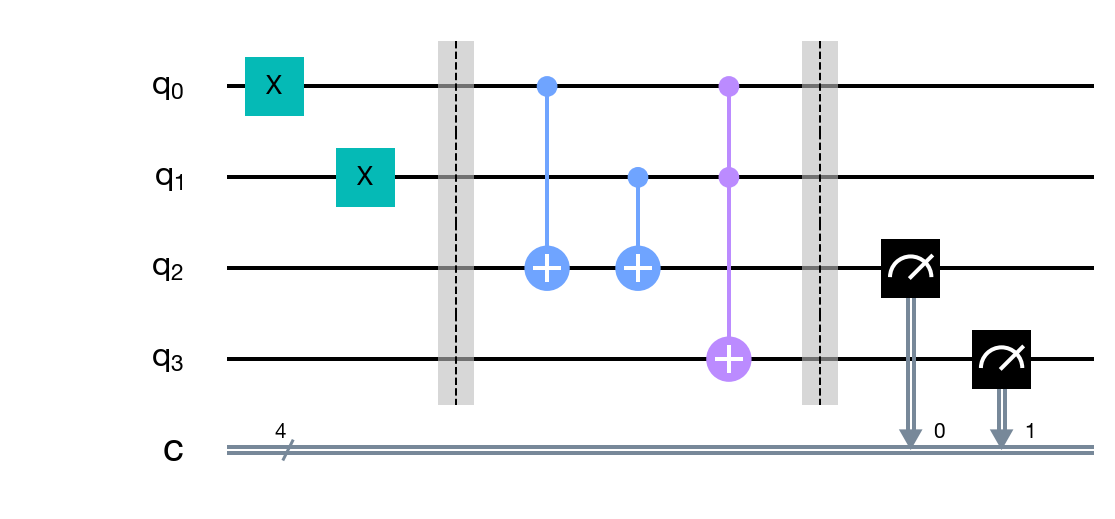

In [32]:
n = 4

qc = QuantumCircuit(n, n)

# encode number through q0 and q1
qc.x(0)
qc.x(1)
qc.barrier()

# copy state of q0 to q2
qc.cx(0, 2)
qc.cx(1, 2)
qc.ccx(0, 1, 3)
qc.barrier()

# project result classical bits
qc.measure(2, 0)
qc.measure(3, 1)

qc.draw(output="mpl", justify="none")

In the first part we set the input qubits using NOT. In the second part the actual arithmetic is processed. We first copy one of the input qubits (in this case the first one) to the first output qubit using CNOT. Second, we apply CNOT with the first output qubit as target and the second input qubit as input. Effectively, this gives us the first bit of our result which is 1 if the inputs are different and 0 otherwise. Finally, we need to set the second output qubit to one if the first input qubits are both 1. We have to use an AND (Toffoli) gate to achieve this. The Toffoli gate takes two inputs (q0, q1) and sets the target (q3) to 1 if both are 1.

In [33]:
execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()

{'0010': 1024}